<a href="https://colab.research.google.com/github/ShivaniMohite1/CODSOFT/blob/main/CODSOFT_ML_Intern_Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CODSOFT :- MACHINE LEARNING INTERNSHIP**

**TASK 4 :- SPAM SMS DETECTION**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

In [ ]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df = pd.read_csv('/content/spam.csv', encoding='ISO-8859-1')

In [ ]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


**Data Cleaning :-**

In [ ]:
df.rename(columns={'v1':'target', 'v2':'sms'}, inplace=True)
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [ ]:
df.head()

,target,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.duplicated().sum()

403

In [ ]:
df.drop_duplicates(keep='first', inplace=True)

In [ ]:
df.isna().sum()

target    0
sms       0
dtype: int64

In [ ]:
df.loc[df.target=='ham', 'target'] = 0
df.loc[df.target=='spam', 'target'] = 1

In [ ]:
df.head()

,target,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.shape

(5169, 2)

In [ ]:
df.head()

,target,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


**EDA :-**

<Axes: ylabel='target'>

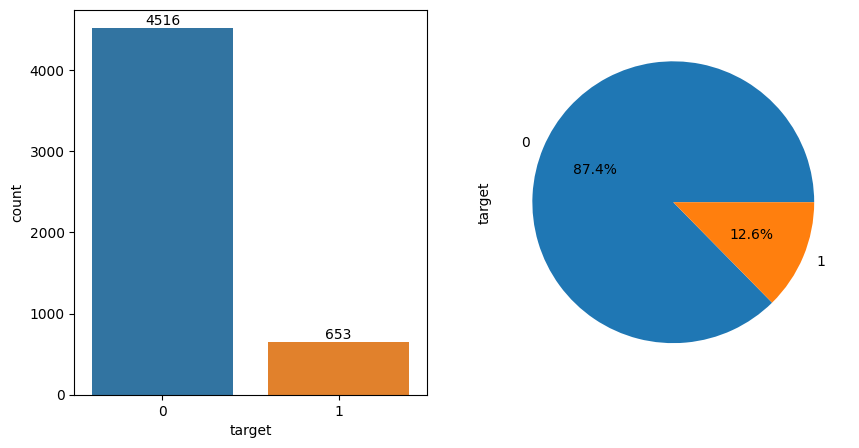

In [ ]:
_, ax = plt.subplots(1, 2, figsize=(10, 5))
plot1 = sns.countplot(df, x='target', ax=ax[0])
# show count number above the bins
for container in plot1.containers:
    plot1.bar_label(container)

df.target.value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax[1])

**Observations:-**
87.4% of the SMSes aren't spam while only 12.6% is actually spam.


**Insights:-**
since the data is imbalanced we need to take that into consideration while splitting the training and testing set

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

**Feature Engineering :-**

In [ ]:
#Number of Sentence-

df['sentences_count'] = df['sms'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [ ]:
#Number Of Word-

df['words_count'] = df['sms'].apply(lambda x: len(nltk.word_tokenize(x)))

In [ ]:
# Number Of Characters -

df['characters_count'] = df['sms'].apply(len)


In [ ]:
df.head()

,target,sms,sentences_count,words_count,characters_count
0,0,"Go until jurong point, crazy.. Available only ...",2,24,111
1,0,Ok lar... Joking wif u oni...,2,8,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,2,37,155
3,0,U dun say so early hor... U c already then say...,1,13,49
4,0,"Nah I don't think he goes to usf, he lives aro...",1,15,61


In [ ]:
df[df.target==1].describe()

,sentences_count,words_count,characters_count
count,653.000000,653.000000,653.000000
mean,2.970904,27.667688,137.891271
std,1.488425,7.008418,30.137753
min,1.000000,2.000000,13.000000
25%,2.000000,25.000000,132.000000
50%,3.000000,29.000000,149.000000
75%,4.000000,32.000000,157.000000
max,9.000000,46.000000,224.000000


In [ ]:
df[df.target==0].describe()

,sentences_count,words_count,characters_count
count,4516.000000,4516.000000,4516.000000
mean,1.820195,17.123782,70.459256
std,1.383657,13.493970,56.358207
min,1.000000,1.000000,2.000000
25%,1.000000,8.000000,34.000000
50%,1.000000,13.000000,52.000000
75%,2.000000,22.000000,90.000000
max,38.000000,220.000000,910.000000


<Axes: xlabel='characters_count', ylabel='Count'>

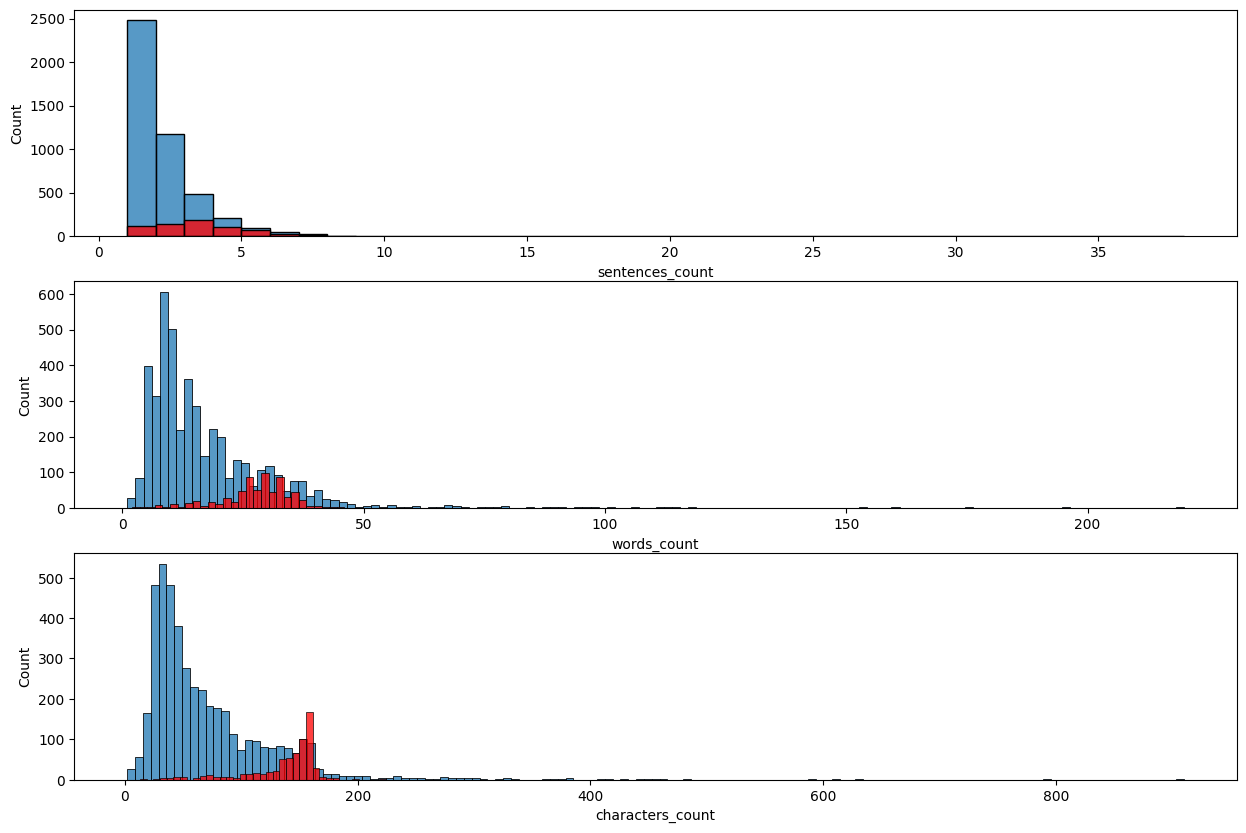

In [ ]:
_, ax=plt.subplots(3,1,figsize=(15,10))

sns.histplot(df[df.target==0]['sentences_count'], ax=ax[0], binwidth=1)
sns.histplot(df[df.target==1]['sentences_count'], color='red', ax=ax[0], binwidth=1)

sns.histplot(df[df.target==0]['words_count'], ax=ax[1])
sns.histplot(df[df.target==1]['words_count'], color='red', ax=ax[1])

sns.histplot(df[df.target==0]['characters_count'], ax=ax[2])
sns.histplot(df[df.target==1]['characters_count'], color='red', ax=ax[2])

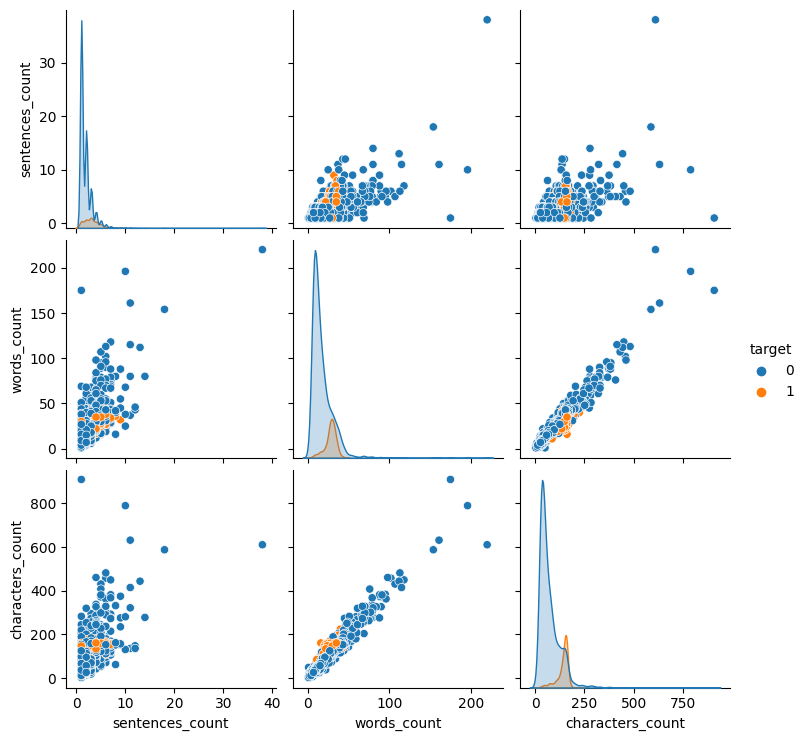

In [ ]:
sns.pairplot(df, hue='target')

**Data Preprocessing :-**

In [ ]:
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [ ]:
def preprocess_text(text):
    # lower text
    text = text.lower()

    # tokenization
    text = nltk.word_tokenize(text)

    # remove special characters
    text = [i for i in text if i.isalnum()]

    # remove stop words & punctuation
    text = [i for i in text if i not in stopwords.words('english') and i not in string.punctuation]

    # stemming
    ps = PorterStemmer()
    text = [ps.stem(i) for i in text]

    return " ".join(text)

In [ ]:
df['text_transformed'] = df['sms'].apply(preprocess_text)

In [ ]:
from wordcloud import WordCloud

wc = WordCloud(width=1000, height=1000, background_color='white', min_font_size=15)

In [ ]:
wc_spam = wc.generate(df[df.target == 1]['text_transformed'].str.cat(sep=' '))

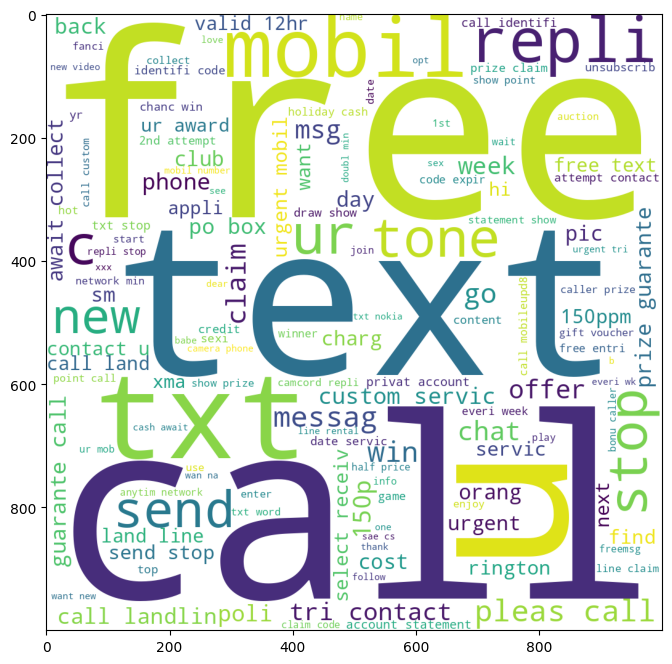

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(wc_spam)

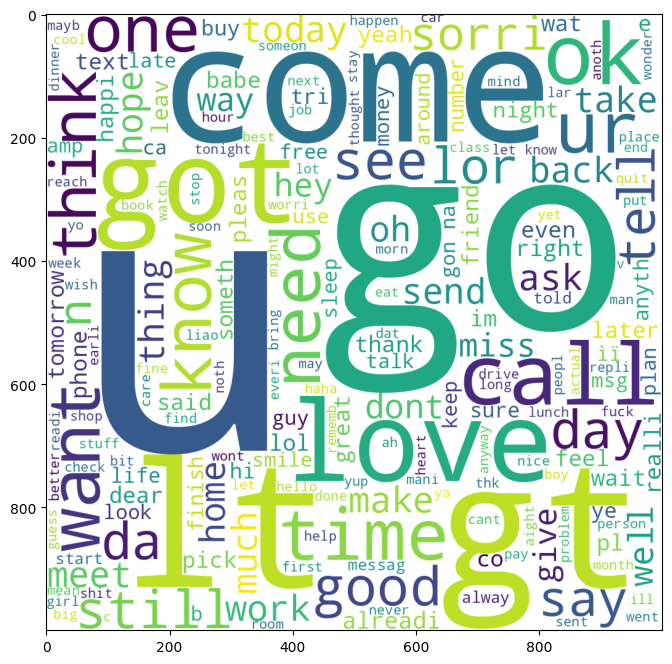

In [ ]:
wc_ham = wc.generate(df[df.target == 0]['text_transformed'].str.cat(sep=' '))
plt.figure(figsize=(8,8))
plt.imshow(wc_ham)

**Modeling :-**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
X = cv.fit_transform(df['text_transformed']).toarray()

In [ ]:
X.shape

(5169, 6708)

In [ ]:
y = df['target'].values

In [ ]:
from sklearn.model_selection import train_test_split

# remember before that our dataset is not balanced that's why we use stratify
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100, stratify=y)

In [ ]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [ ]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [ ]:
def test_models(models):

    scores = {'model': [],
             'accracy score': [],
             'precision score': []}

    _, ax = plt.subplots(1, len(models), figsize=(20,5))

    for index, model in enumerate(models):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        scores['model'].append(type(model).__name__)
        scores['accracy score'].append(accuracy)
        scores['precision score'].append(precision)

        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax[index], fmt=".0f")
        ax[index].set_title(type(model).__name__)

    scores = pd.DataFrame(scores)
    return scores

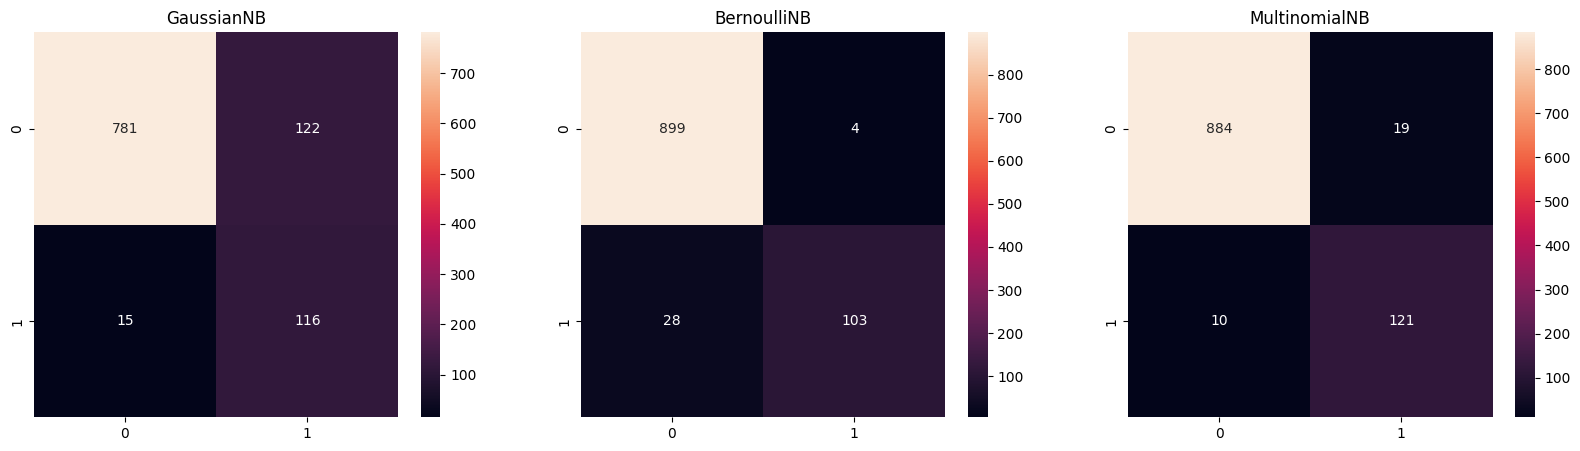

In [ ]:
models = [
    GaussianNB(),
    BernoulliNB(),
    MultinomialNB(),
]
scores = test_models(models)

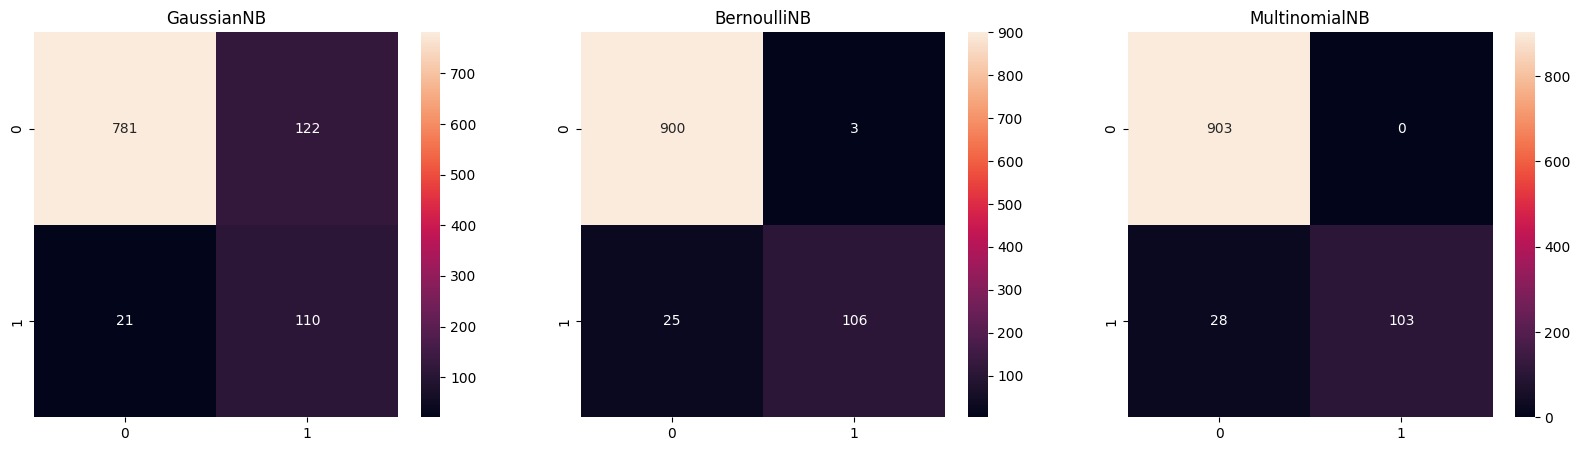

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
"""
If not None, build a vocabulary that only consider the top max_features ordered by term frequency across the corpus. Otherwise, all features are used.
for 4000 it's an experimental value that gaves us good results
"""
tfidf = TfidfVectorizer(max_features=4000)
X = tfidf.fit_transform(df['text_transformed']).toarray()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100, stratify=y)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

models = [
    GaussianNB(),
    BernoulliNB(),
    MultinomialNB(),
]
scores = test_models(models)

In [ ]:
scores

,model,accracy score,precision score
0,GaussianNB,0.861702,0.474138
1,BernoulliNB,0.972921,0.972477
2,MultinomialNB,0.972921,1.000000


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "SCV": SVC(),
    "KNN": KNeighborsClassifier(),
    "MNB": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(max_depth=5),
    "Random Forest": RandomForestClassifier(n_estimators=60, n_jobs=-1),
    "Extra Trees": ExtraTreesClassifier(n_estimators=60, n_jobs=-1),
    # long training time
    #"Ada Boost": AdaBoostClassifier(n_estimators=60),
    #"Bagging clf": BaggingClassifier(n_estimators=60, n_jobs=-1),
    #"Gradient Boosting": GradientBoostingClassifier(n_estimators=60),
    #"XGB": XGBClassifier(n_estimators=60),
}

In [ ]:
def train_clf(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision

In [ ]:
import time

accuracy_scores = []
precision_scores = []

for key, model in models.items():
    start = time.time()
    accuracy, precision = train_clf(model, X_train, y_train, X_test, y_test)
    stop = time.time()
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    print(f'Model: {key}, ' +
         f'accuracy: {np.round(accuracy, 2)}, ' +
         f'precision: {np.round(precision, 2)}, ' +
         f'training time(s): {np.round((stop - start), 2)}')

Model: Logistic Regression, accuracy: 0.96, precision: 0.98, training time(s): 0.75
Model: SCV, accuracy: 0.97, precision: 0.99, training time(s): 33.76
Model: KNN, accuracy: 0.92, precision: 1.0, training time(s): 2.13
Model: MNB, accuracy: 0.97, precision: 1.0, training time(s): 0.1
Model: Decision Tree, accuracy: 0.93, precision: 0.79, training time(s): 1.01
Model: Random Forest, accuracy: 0.97, precision: 1.0, training time(s): 7.37
Model: Extra Trees, accuracy: 0.98, precision: 1.0, training time(s): 25.39


In [ ]:
benchmark_df = pd.DataFrame({'Classifier': models.keys(),
                            'Accuracy': accuracy_scores,
                            'Precision': precision_scores})

In [ ]:
benchmark_df.sort_values(by='Precision', ascending=False)

,Classifier,Accuracy,Precision
2,KNN,0.916828,1.000000
3,MNB,0.972921,1.000000
5,Random Forest,0.968085,1.000000
6,Extra Trees,0.975822,1.000000
1,SCV,0.972921,0.990476
0,Logistic Regression,0.955513,0.977528
4,Decision Tree,0.927466,0.791667


In [ ]:
best_models = {
    "Random Forest": RandomForestClassifier(n_jobs=-1),
    "MNB": MultinomialNB(),
    "KNN": KNeighborsClassifier(n_jobs=-1),
}
grid = {
    "Random Forest": {
                    "n_estimators": [50, 100, 150, 200],
                    "max_depth": [None, 5, 10, 20, 30],
                    "min_samples_split": [2, 5, 10]
                    },
    "MNB": {
        "alpha": [0.1, 0.5, 1.0]
          },
    "KNN": {
        "n_neighbors": [3, 5, 7],
        "weights": ["uniform", "distance"]
            }
}

In [ ]:
# create validation set to avoid trying to find hyper parameters based on testing data that might lead us to overfitting

X_train_, X_valid, y_train_, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=100, stratify=y_train)
y_train_ = y_train_.astype(int)
y_valid = y_valid.astype(int)

In [ ]:
from sklearn.model_selection import GridSearchCV

model_best_params = best_models.copy()

for key, model in best_models.items():
    start = time.time()

    # cv>1 takes long time
    grid_search = GridSearchCV(estimator=model, param_grid=grid[key], cv=None, n_jobs=-1, scoring='f1')


    stop = time.time()
    training_time = np.round((stop-start), 2)


    print(f'Model: {key}, '+

           f'training time(s): {training_time}')


Model: Random Forest, training time(s): 0.0
Model: MNB, training time(s): 0.0
Model: KNN, training time(s): 0.0


In [ ]:
model_best_params

{'Random Forest': RandomForestClassifier(n_jobs=-1),
 'MNB': MultinomialNB(),
 'KNN': KNeighborsClassifier(n_jobs=-1)}

In [ ]:
accuracy_scores = []
precision_scores = []

for key, model in best_models.items():

    accuracy, precision = train_clf(model, X_train, y_train, X_test, y_test)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    print(f'Model: {key}, ' +
         f'accuracy: {np.round(accuracy, 2)}, ' +
         f'precision: {np.round(precision, 2)}, ')

temp_df = pd.DataFrame({'Classifier': best_models.keys(),
                            'Accuracy': accuracy_scores,
                            'Precision': precision_scores})

Model: Random Forest, accuracy: 0.97, precision: 1.0, 
Model: MNB, accuracy: 0.97, precision: 1.0, 
Model: KNN, accuracy: 0.92, precision: 1.0, 


In [ ]:
temp_df

,Classifier,Accuracy,Precision
0,Random Forest,0.970019,1.0
1,MNB,0.972921,1.0
2,KNN,0.916828,1.0


In [ ]:
benchmark_df

,Classifier,Accuracy,Precision
0,Logistic Regression,0.955513,0.977528
1,SCV,0.972921,0.990476
2,KNN,0.916828,1.000000
3,MNB,0.972921,1.000000
4,Decision Tree,0.927466,0.791667
5,Random Forest,0.968085,1.000000
6,Extra Trees,0.975822,1.000000
